# Importing the dependencies

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
%matplotlib inline

#### Read data set.
There is no header in data set so assign header=None

In [2]:
house_df = pd.read_csv("housing.csv", header=None, delimiter=r"\s+")
house_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


#### Assigning column name to the data set

In [3]:
house_df.columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD' ,'TAX', 'PTRATIO','B','LSTAT','Price']

In [4]:
house_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


#### We can find data set shape and size by share attribute

In [5]:
house_df.shape

(506, 14)

#### Now we need to check missing values in the data set

In [6]:
house_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

#### As there is no missing values, Now we need to check the data type of each column because there may be wrong data type assigned in data set

In [7]:
house_df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
Price      float64
dtype: object

#### There is no mis-match of data type
#### Now we need check the Statistical measure of data set

In [8]:
house_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


#### As there is no missing value in data set so every feature have count 506
#### We need to find the correlation between features

In [9]:
correlation = house_df.corr()
correlation

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


#### the diagonal values are 1 because the correlation with self is always 1
#### We need to construct the heat map to understand the correlation

<AxesSubplot:>

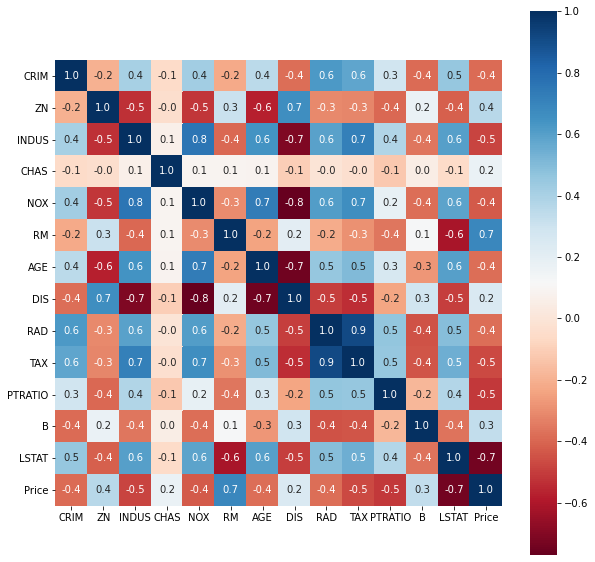

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True,square=True,fmt='.1f',annot=True,cmap='RdBu')

###### Now we will split the dependent and independant feature of the data set

In [19]:
# x is data frame of independant variable
X = house_df.drop(['Price'], axis=1)

# y is the data frame series of dependant value
Y = house_df['Price']

In [18]:
print(X)
print(Y)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273.0   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       1

#### Now we need to split data into train and test data

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

#### We can check splitted data

In [22]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(506, 13)
(404, 13)
(102, 13)


## Model Training

### XGBoost Regressor

In [23]:
# load the model
xgb_model = XGBRegressor()

In [24]:
#training the model
xgb_model.fit(X_train, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

#### Predict price on training data

In [27]:
train_predicted_value = xgb_model.predict(X_train)

In [28]:
train_predicted_value

array([23.147501 , 20.99463  , 20.090284 , 34.69053  , 13.903663 ,
       13.510157 , 21.998634 , 15.1940975, 10.899711 , 22.709627 ,
       13.832816 ,  5.592794 , 29.810236 , 49.99096  , 34.89215  ,
       20.607384 , 23.351097 , 19.23555  , 32.695698 , 19.641418 ,
       26.991022 ,  8.401829 , 46.00729  , 21.708961 , 27.062933 ,
       19.321356 , 19.288303 , 24.809872 , 22.61626  , 31.70493  ,
       18.542515 ,  8.697379 , 17.395294 , 23.700663 , 13.304856 ,
       10.492197 , 12.688369 , 25.016556 , 19.67495  , 14.902088 ,
       24.193798 , 25.007143 , 14.900281 , 16.995798 , 15.6009035,
       12.699232 , 24.51537  , 14.999952 , 50.00104  , 17.525454 ,
       21.184624 , 31.998049 , 15.613355 , 22.89754  , 19.325378 ,
       18.717896 , 23.301125 , 37.222923 , 30.09486  , 33.102703 ,
       21.00072  , 49.999332 , 13.405827 ,  5.0280113, 16.492886 ,
        8.405072 , 28.64328  , 19.499939 , 20.586452 , 45.402164 ,
       39.79833  , 33.407326 , 19.83506  , 33.406372 , 25.2714

## Visualizing the actual price and predicted price on training data

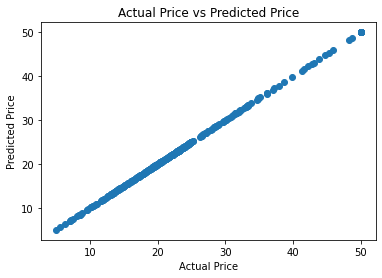

In [35]:
plt.scatter(Y_train, train_predicted_value)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.show()

#### Here we can see that the actual price and predicted price are match
#### R square and MSE on training data

In [30]:
# R square error
r_score_train = metrics.r2_score(Y_train, train_predicted_value)


# MSE error
mse_score_train = metrics.mean_absolute_error(Y_train, train_predicted_value)
                                        

print("R square error = ", r_score_train)
                                        
print("MSE error = ", mse_score_train)

R square error =  0.9999948236320982
MSE error =  0.0145848437110976


#### very small error because we predict on the training data
Predict the price by test data

In [31]:
test_predicted_value = xgb_model.predict(X_test)

In [33]:
test_predicted_value

array([20.288406 , 20.60247  , 30.9758   , 29.910797 ,  8.624953 ,
       14.235525 , 23.523052 , 29.730324 , 31.97293  , 22.015892 ,
       27.946804 , 24.034412 , 20.771402 , 21.849985 , 12.024127 ,
       22.074675 , 18.487509 , 11.052485 ,  8.141267 , 15.730722 ,
       23.163914 , 20.233883 , 35.700928 , 19.041637 , 15.129744 ,
       20.228016 , 47.067314 , 30.426474 , 32.729023 , 17.345776 ,
       17.889462 , 19.40687  , 30.769133 , 25.431686 , 12.05332  ,
       17.900238 , 11.031679 , 21.109531 , 20.64321  , 21.982754 ,
       25.016281 , 12.648555 , 31.042107 ,  7.106914 , 18.685764 ,
       14.380013 , 34.902393 , 16.130005 , 32.98537  , 10.950912 ,
       27.335018 , 29.399937 ,  7.0065055, 35.398712 , 22.978228 ,
       18.582758 , 19.224293 , 20.003431 , 15.341814 , 22.38517  ,
       19.077105 , 21.955967 , 18.91404  , 32.77595  , 32.76772  ,
       24.36317  , 48.262913 , 23.385014 , 10.551914 , 22.664684 ,
       14.671612 ,  8.881822 , 16.700302 , 17.221045 , 26.2046

#### R square and MSE on test data

In [34]:
# R square error
r_score_test = metrics.r2_score(Y_test, test_predicted_value)


# MSE error
mse_score_test = metrics.mean_absolute_error(Y_test, test_predicted_value)
                                        

print("R square error = ", r_score_test)
                                        
print("MSE error = ", mse_score_test)

R square error =  0.8711660369151691
MSE error =  2.2834744154238233


### So the R square error difference between train data and test data is very less and so our model perform good

## Visualizing the actual price and predicted price on test data

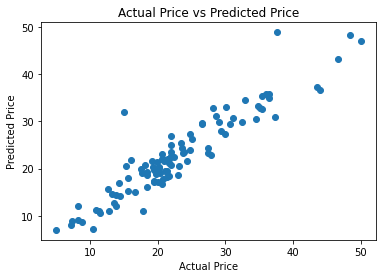

In [36]:
plt.scatter(Y_test, test_predicted_value)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Price vs Predicted Price')
plt.show()

#### Here less accurancy on test data